# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами

Выполнил студент гр. 9381 Матвеев Андрей, вариант 8.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при $t \rightarrow + \infty$

## Основные теоретические положения



Линейная однородная система с периодическими коэфицентами - система однородных ОЛДУ вида:

$X'=A(t)X\;\;\;$, $A(t+T)=A(t)\;\;,t \geq 0 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$

Пусть $\Phi(t)$ - фундаментальная матрица системы $X'=A(t)X\;\;\;$, $A(t+T)=A(t)\;\;,t \geq 0 \;\;$, т.е. её столбцы - линейно независимые решения уравнения. 

#### Определение

Матрица С, удовлетворяющая условию $\Phi(t+T)=\Phi(t)C,\;\;\;\;$ $ \forall t \geq 0, \;\;\;\;$
называется основной для фундаментальной матрицы $\Phi(t)$.

Cдвиг на период в аргументе фундаментальной матрицы равносилен умножению ее на
основную матрицу.

#### Определение 
Спектральным радиусом матрицы называется максимум модуля ее собственных чисел 

Обозначение:

$\rho(A)=max|\lambda_j|\;\;\;\;0 \leq j \leq n$


## Постановка задачи

Дано дифференциальное уравнение:

$x'' + a(p,t)x = 0,\;\;\;\;\;\;\;\;$  $a(p,t)=p+b(t),\;\;\;\;\;\;\;\;$ $b(t+T)=b(t)$,

где $p$ - параметр.

Данное уравнение сводится к системе двух уравнений I-го порядка:

$
\begin{cases}
   u'_1 = u_2, \\
   u'_2 = -a(p,t)u_1;
\end{cases}
 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (1)
$

Здесь $u_1(t) = x(t), \; u_2(t) = x'(t)$.

Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной
периодической системе, а не только к системе вида (1).

## Схема решения

1. Задаем массив значений параметра $p$. Например, $p$  меняется от 0.1 до 5 с шагом 0.05. Для каждого значения $p$ проделаем следующие действия (в теле цикла).

2. Вычисляем значение фундаментальной матрицы системы (1) при $t = T$ с помощью любой программы численного решения задачи Коши. Для этого решаем две задачи Коши с начальными векторами $V_1=(1,0)^T$ и $V_2=(0,1)^T$ на отрезке $[0, T]$. Пусть вектор-функции $U(t, V_1)$, $U(t, V_2)$ - решения таких задач. Они являются столбцами фундаментальной матрицы $\Phi(t)$, удовлетворяющей условию $\Phi(0)=E$. Основную матрицу для $C$ для $Ф(t)$ получаем из формулы $C = \Phi(T)$. Столбцы матрицы $C$ это векторы $U(T, V_1)$, $U(T, V_2)$.

3. Вычисляем собственные числа матрицы 𝐶 и ее спектральный радиус, т.е.
$$ r(p) = \max\limits_{j = 1,2}|\lambda_j|.$$
В результате имеем массив значений $r(p)$;

4. Вывод об устойчивости или неустойчивости делается в зависимости от значения $r(p)$.
Рекомендуется построить график этой зависимости, из которого с достаточной точностью можно определить точку $p_0$, которая разделяет зоны устойчивости и неустойчивости, в которых $r \le 1$ и $r \gt 1$. Более точно
вычисляется методом половинного деления.

Матрицу $C$ можно найти только приближенно, решая численно две задачи Коши.

## Выполнение работы

## Вариант 8
Функция $b(t) = \sqrt{2+cos(3t)}$

Задаем массив значений параметра $p$. 

График функции $b(t)$ при $t \in [0, 2T]$ приведен ниже:

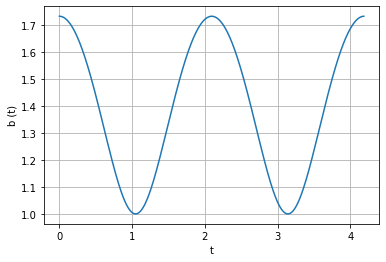

In [100]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


step = 0.005
pFrom = 0
pTo = 15
# 1) задаём массив значений параметра p
pValues = np.arange(pFrom, pTo, step)

# возмём период равным 2*pi/3
T = 2*np.pi/3
tVector = np.arange(0, 2*T,  step)


# описание функций b и a соответственно
def b(t):
    return np.sqrt(2+np.cos(3*t))

def a(p, t):
    return p + b(t)

bVector = [b(t) for t in tVector]

plt.xlabel("t")
plt.ylabel("b (t)")
plt.grid(True)
plt.plot(tVector, bVector)


Вычисляем значение фундаментальной матрицы системы (1) при $t = T$ с помощью программы численного решения задачи Коши

Вычисляем собственные числа матрицы 𝐶 и ее спектральный радиус.

In [101]:
v1 = [1, 0]
v2 = [0, 1]

# эта функция представляет собой систему уравнений (1)
def UTV(uDerVector, t):
    return [
            uDerVector[1], 
            -a(p, t)*uDerVector[0]
    ]
    
tVector = np.arange(0, T,  step)
eigValsC = []
specRad = 0
specRadVector = []
for p in pValues:
    # 2) Вычисляем значение фундаментальной матрицы системы (1)
        #Решаем 2 задачи Коши с начальными векторами v1 и v2 на отрезке [0, T]
    utv1 = odeint(UTV, v1, tVector) # столбцы фундаментальной матрицы Ф(0), удовл. усл. Ф(0)=E
    utv2 = odeint(UTV, v2, tVector)
    C = np.array([ # столбцы матрицы C = Ф(T) - векторы u(T, v1), u(T, v2)
        [utv1[-1][0],  utv2[-1][0]],
        [utv1[-1][1],  utv2[-1][1]]]
    )
#     print(C)
    eigValsC = np.linalg.eigvals(C)# Вычисляем собственные числа матрицы 𝐶 и ее спектральный радиус
#     print(eigValsC)
    specRad = max(abs(eigValsC))
#     print(specRad)
    specRadVector.append(specRad) # массив значений r(p)
    

    

Сделаем вывод об устойчивости или неустойчивости (он делается в зависимости от значения $r(p)$).

Построим график этой зависимости, из которого с достаточной точностью можно определить точку $p_0$, которая разделяет зоны устойчивости и неустойчивости, в которых $r \leq 1$ и $r > 1$. Но сначала построим график спектрального радиуса для всех значений параметра p из массива pValues.

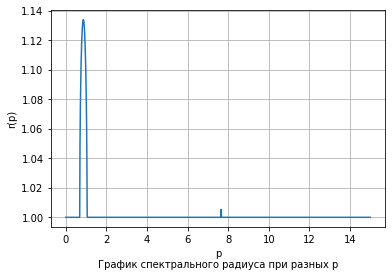

In [102]:
plt.xlabel('p\nГрафик спектрального радиуса при разных p')
plt.ylabel('r(p)')
plt.grid(True)
plt.plot(pValues, specRadVector)

Пусть точка $p_0$ - это следующая точка после той, где $r(p) > 1$ В ПОСЛЕДНИЙ раз. Т.е. начиная с $p_0$ $r(p) \leq 1$. Найдём $p_0$ с точностью $10^{-3}$.

In [103]:
# Проще всего её найти, запустив цикл обхода в обратном порядке.
pair = [0, 0] 
prev = [0, 0]
for i in range(len(pValues)-1, -1, -1):
    if(abs(specRadVector[i]-1) > 0.001):
        pair = [pValues[i+1], specRadVector[i+1]]
        prev = [pValues[i], specRadVector[i]]
        break

print('before_p_0 = {}, r(before_p_0) = {}'.format(round(prev[0], 5), round(prev[1], 5)))
print('p_0 = {}, r(p_0) = {}'.format(round(pair[0],5), round(pair[1], 5)))

before_p_0 = 7.665, r(before_p_0) = 1.00165
p_0 = 7.67, r(p_0) = 1.0


Отметим на графике спектрального радиуса основной матрицы точку $p_0$.

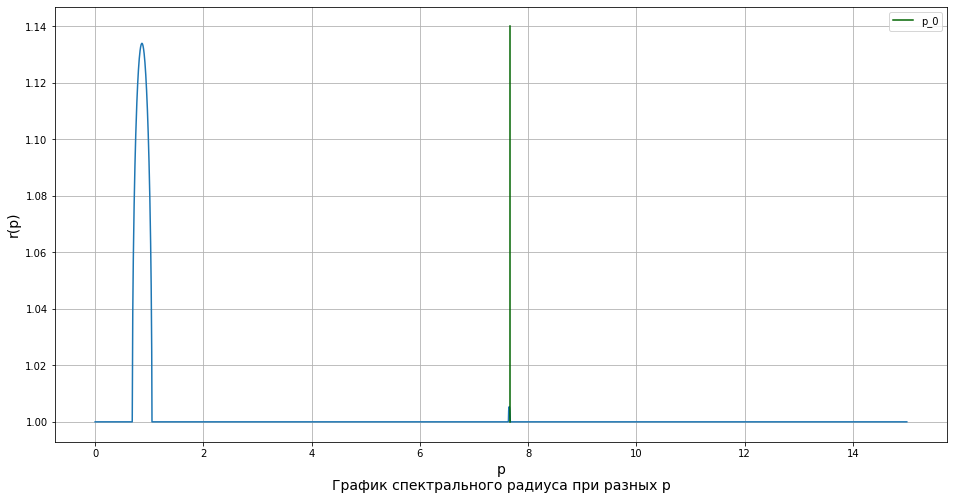

In [104]:
plt.figure(figsize=(16, 8))
plt.xlabel('p\nГрафик спектрального радиуса при разных p', fontsize= 14)
plt.ylabel('r(p)', fontsize=14)
plt.grid(True)
plt.plot(pValues, specRadVector)
plt.plot([pair[0], pair[0]], [1, 1.14], color="darkgreen", label="p_0")
plt.legend()

In [105]:
# Найдем приблизительно интервалы неустойчивости.
pushIt = [0, 0]
nonStableInts = []
for i in range(0,len(pValues)-1):
    if((abs(specRadVector[i]-1) > 0.001) and (abs(specRadVector[i+1]-1) > 0.001) and pushIt[0] == 0):
        if(i > 0):
            pushIt[0] = round(pValues[i-1], 5)
        else:
            pushIt[0] = round(pValues[0], 5)
    if((abs(specRadVector[i]-1) > 0.001) and (abs(specRadVector[i+1]-1) < 0.001) and pushIt[1] == 0):
        pushIt[1] = round(pValues[i+1], 5)
        nonStableInts.append(pushIt)
        pushIt = [0, 0]
print("Список интервалов неустойчивости:\n{}".format(nonStableInts))

Список интервалов неустойчивости:
[[0.685, 1.05], [7.635, 7.67]]


Из графика видно, что на отрезке $0 \leq p \leq 8$ есть интервалы, на которых $r(p) > 1$. При таких значениях $p$ по крайней мере часть решений системы не ограничена и система неустойчива. 

Первый интервал неустойчивости примерно (0,685; 1.05). За ним идёт отрезок, примерно $[1.05, 7.635]$, на котором $r(p) = 1$. При таких значениях все решения системы ограничены  и система устойчива. Далее снова интервал неустойчивости примерно (7.635, 7.67) и,наконец, при $p = p_0 \geq 7.67$ (примерно) идёт зона устойчивости.




Начиная с $p_0 = 7.67 ,\;\;\;\;\; r(p)  \leq 1$ c точностью $10^{-3}$. 

## Выводы

В ходе работы изучена устойчивость однородного линейного уравнения с периодическими коэффициентами при $t\rightarrow + \infty$.  Проведено исследование устойчивости однородного линейного уравнения, которое показало, что с точностью $10^{-3}$ граница зоны устойчивости и неустойчивости равна $p_0 = 7.67$, а именно, начиная с $p = p_0 \geq 7.67$ идёт зона устойчивости. Это означает, что при $p < 7.67$ система неустойчива, а при $p \geq 7.67$ - устойчива (с точностью $10^{-3}$).
